Computer Vision libraries
- torchvision - base domain lib for CV 
- torchvision.datasets - get datasets and data loading funcs for CV
- torchvision.models - get pretrained computer vision models that you can use
- torchvision.transforms = funcs for manipulating vision data/images
- torch.utils.data.Dataset - base Dataset class for PyTorch
- torch.utils.data.DataLoader - Creates a python iterable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.0
0.15.1


In [2]:
from pathlib import Path    

In [3]:
data_root = Path("/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks/data")
data_root.mkdir(parents=True, exist_ok=True)

In [4]:
# Setup train data 
train_data = datasets.FashionMNIST(
    root=data_root, ## where to download
    train=True,
    download=True,
    transform=ToTensor(), # how to transform input data
    target_transform=None,  # how to transform the labels/targets
)

# setup test data
test_data = datasets.FashionMNIST(
    root=data_root,
    train=False,
    transform=ToTensor(),
    target_transform=None,
)

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
image, label = train_data[0]
label, image.shape

(9, torch.Size([1, 28, 28]))

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

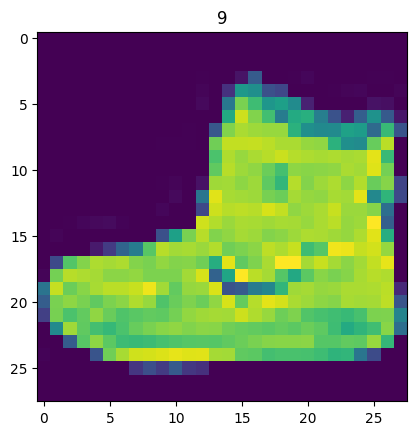

In [10]:
import matplotlib.pyplot as plt
image, label =train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

In [11]:
class_names[label]

'Ankle boot'

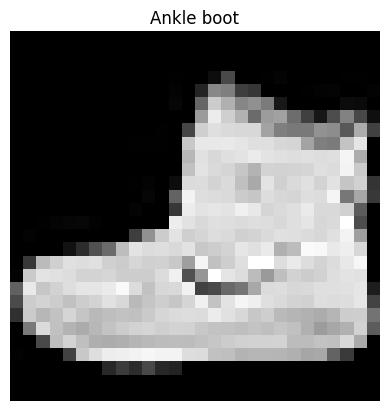

In [12]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False);

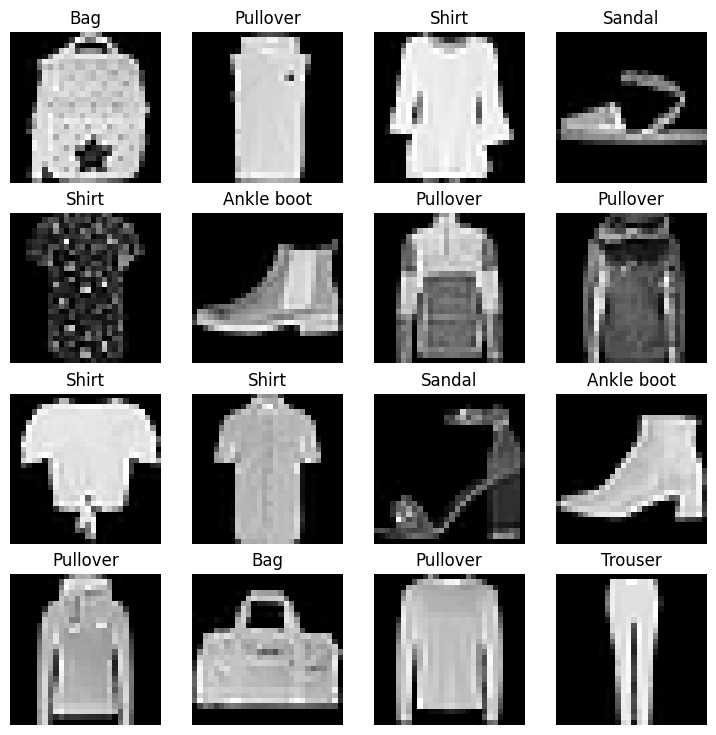

In [13]:
# plot more (random) images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    #print(i)
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    #print(random_idx)
    img, label = train_data[random_idx]
    plt.subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)


In [14]:
torch.randint(0, len(train_data), size=[1])

tensor([5782])

In [15]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks/data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: /Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja/pytorch-deep-learning-main/my_notebooks/data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader
RIght now the data is in the form of pyTorch datasets
- DataLoader turns our PyTorch dataset into a Py iterable
- We have to turn our data into mini-batches (size~32)
    - More computationally efficient, especially with a GPU but Generally, your computing hardwre may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
    - It gives our nueral network more chances to update and learning with a range of epochs

In [16]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x169a2d340>,
 <torch.utils.data.dataloader.DataLoader at 0x169a2d220>)

In [17]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"length of train dataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"len of test DataLoaders: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x169a2d340>, <torch.utils.data.dataloader.DataLoader object at 0x169a2d220>)
length of train dataLoader: 1875 batches of 32
len of test DataLoaders: 313 batches of 32


In [18]:
32*312

9984

In [19]:

it = iter(train_dataloader)
next(it)[-1], next(it)[-1].shape

(tensor([2, 6, 8, 6, 0, 0, 4, 0, 4, 9, 3, 3, 0, 4, 4, 7, 4, 3, 7, 6, 2, 4, 2, 4,
         1, 2, 9, 2, 7, 3, 0, 5]),
 torch.Size([32]))

In [20]:
# ccheckout whats inside the train dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


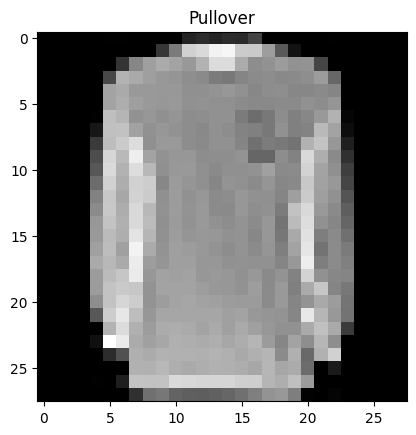

In [21]:
# show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
print(f"Image shape: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. MODEL 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, its best practice to start with a baseline model


In [22]:
# Create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[:]
#x.shape

out = flatten_model(x) # fwd pass through flatten

print(f"Shape before flatttening: {x.shape}")
print(f"shape after flattening: {out.shape}")

Shape before flatttening: torch.Size([32, 1, 28, 28])
shape after flattening: torch.Size([32, 784])


In [23]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.Linear(hidden_units, output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [25]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to(device)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [26]:
dummy_x = torch.rand((1, 1, 28, 28))
model_0(dummy_x), model_0(dummy_x).shape

(tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
          -0.1004,  0.0157]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

In [27]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

- loss: nn.CrossEntropyLoss()
- optimizer: torch.optim.SGD()
- evaluation metric: accuracy (assuming moderately balanced datasets)


In [28]:
from helper_functions import accuracy_fn

In [29]:
# setup loss fun and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a func to time our experiments

Two of the things that often has to be tracked:
1. Model's performance (loss and accuracy values etc).
2. How fast it runs.

In [30]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints the difference between start and end time."""
    total_time = end - start
    print(f"train time on {device}: {total_time:.3f} seconds")
    return total_time

In [31]:
start_time = timer()
# some code
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

train time on cpu: 0.000 seconds


9.791000000092254e-06

### 3.3 Creating a training loop and training on batches of data 
1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out the progress.
5. Time it all.

In [37]:
## import tqdm for pregress bar
from tqdm.auto import tqdm

#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs
epochs = 3

# create a training and a test loop

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    ### Training
    train_loss = 0
    # add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. fwd pass
        y_pred = model_0(X)

        # 2. Calcuylate loss (per batch)
        loss = loss_fn(y_pred, y) # loss for this batch
        train_loss += loss # accumulate the loss for the epoch

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. backward propagation
        loss.backward()

        #5. optimizer step
        optimizer.step()

        # prit progress:
        if batch % 400 == 0:
            print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide  total train loss by the len of the train data loader
    train_loss /= len(train_dataloader)

    ### Testing

    test_loss, test_acc = 0.0, 0.0

    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test) # fwd pass

            test_loss += loss_fn(test_pred, y_test) # test loss

            test_acc += accuracy_fn(y_true=y_test,
                                    y_pred=test_pred.argmax(dim=1))
            
        ## calc test loss and acc per 
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    
    # prnt progress
    print(f"\n Train Loss: {train_loss} | Test loss: {test_loss:.4f} | test acc: {test_acc:.4f} ")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device="cpu")



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 Train Loss: 0.4439547061920166 | Test loss: 0.4651 | test acc: 83.6462 
Epoch: 1
------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 Train Loss: 0.4366232752799988 | Test loss: 0.4645 | test acc: 83.8858 
Epoch: 2
------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 Train Loss: 0.43045276403427124 | Test loss: 0.4659 | test acc: 83.9257 
train time on cpu: 7.205 seconds


In [35]:
train_dataloader.dataset.__len__()


60000

## 4. Make prediction and Model 0 results

In [41]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dict containing the results of model prediction on data_loader"""
    loss, acc = 0.0, 0.0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X) # fwd pass

            # Accumulare the loss and acc values per batch
            loss += loss_fn(y_pred, y)

            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        # scale loss and acc to find the average loss per batch

        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4659360349178314,
 'model_acc': 83.92571884984025}